<a href="https://colab.research.google.com/github/BiancadeFrancisco/Classificacao_CaseChurn/blob/main/Case_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel("/content/churn_data.xlsx")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# ENTENDER OS DADOS:

#Target:

#Churn — Cliente deu churn ou não

#Variáveis numéricas:

#Tenure — Número de meses que o cliente está na base
#MonthlyCharges — A quantia consumida por cliente mensalmente
#TotalCharges — A quantia consumida por cliente total

#Variáveis categóricas:

#CustomerID - Id do cliente
#Gender — M/F
#SeniorCitizen — Se o cidadão é ou não idoso (0,1)
#Partner — Se o cliente é ou não casado
#Dependents — Cliente tem dependentes (Yes, No)
#PhoneService — Cliente tem serviço telefonico (Yes, No)
#MulitpleLines — Se o cliente tem várias linhas ou não (Yes, No, No Phone Service)
#InternetService — Tipo do serviço de internet (DSL, Fiber Optic, None)
#OnlineSecurity — Se o cliente tem segurança online (Yes, No, No Internet Service)
#OnlineBackup — WSe o cliente tem Backup Online (Yes, No, No Internet Service)
#DeviceProtection — Se o cliente tem proteção do dispositivo (Yes, No, No Internet Service)
#TechSupport — Se o cliente tem suporte tecnológico (Yes, No, No Internet Service)
#StreamingTV — Se o cliente tem streaming de TV (Yes, No, No Internet Service)
#StreamingMovies — Se o cliente tem serviço de streaming de filmes (Yes, No, No Internet Service)
#Contract — Termo de contrato do cliente (Monthly, 1-Year, 2-Year)
#PaperlessBilling — Se o cliente tem ou não boleto sem papel (Yes, No)
#PaymentMethod — Método de pagamento do cliente(E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [ ]:
# FAZER ALGUMAS AGREGAÇÕES PARA ANÁLISES:

churn_agg = df.groupby("Churn")["customerID"].count().reset_index()
churn_agg


,Churn,customerID
0,No,5163
1,Yes,1869


<Axes: xlabel='Churn', ylabel='customerID'>

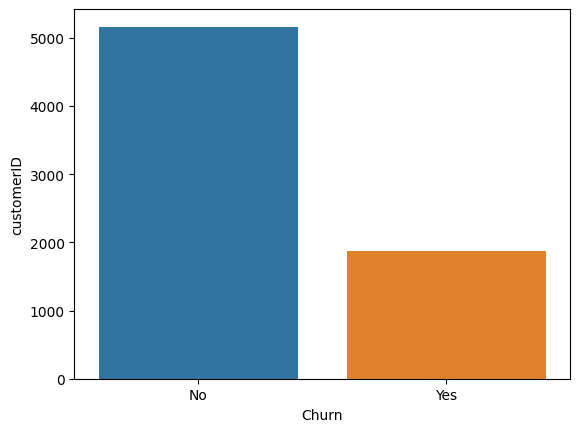

In [ ]:
sns.barplot(data = churn_agg, x="Churn", y="customerID")

In [ ]:
churn_payment = df.groupby("PaymentMethod")["customerID"].count().reset_index()
churn_payment


,PaymentMethod,customerID
0,Bank transfer (automatic),1542
1,Credit card (automatic),1521
2,Electronic check,2365
3,Mailed check,1604


<Axes: xlabel='PaymentMethod', ylabel='customerID'>

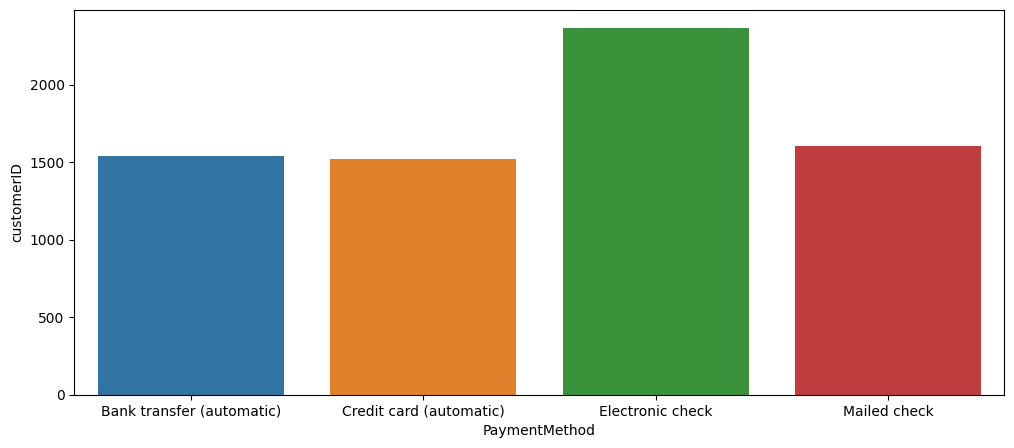

In [ ]:
plt.figure(figsize = (12,5))
sns.barplot(data = churn_payment, x="PaymentMethod", y="customerID")

In [ ]:
churn_gender = df.groupby("gender")["customerID"].count().reset_index()
churn_gender

,gender,customerID
0,Female,3483
1,Male,3549


<Axes: xlabel='gender', ylabel='customerID'>

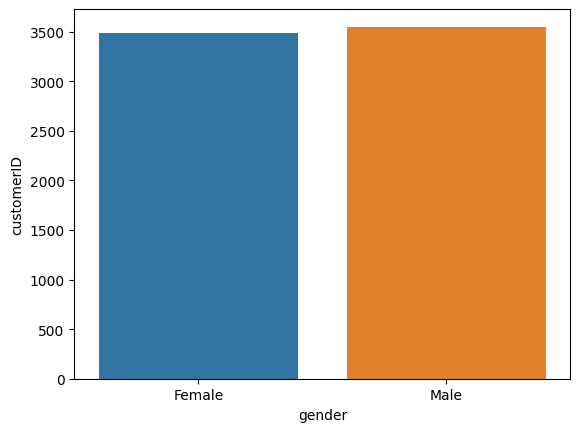

In [ ]:
sns.barplot(data = churn_gender, x="gender", y="customerID")

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
# DISTRIBUIR X E Y:

X = df.drop(columns=["customerID", "Churn"], axis = 1) #todas colunas, menos customerID e Churn

y = df[["Churn"]]

In [ ]:
# TRANSFORMAR COLUNA "CHURN" EM FORMATO BINÁRIO:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(y.Churn)

y.Churn = le.transform(y.Churn)

<ipython-input-14-e3bd0e29f660>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Churn = le.transform(y.Churn)


In [ ]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


In [ ]:
# TRANSFORMAR VARIÁVEIS CATEGÓRICAS DO X EM DUMMIES:

X = pd.get_dummies(X)

In [ ]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7028,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7029,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7030,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
# FAZER NORMALIZAÇÃO DAS NOSSAS VARIÁVEIS:

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

X = pd.DataFrame(mm.fit_transform(X))

In [ ]:
# SEPARAR TREINO E TESTE:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.25)

In [ ]:
# TESTAR MODELO DE ALGORITMO: REGRESSÃO LOGÍSTICA

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lr.predict(X_test)

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
X_test.assign(churn=y_test).assign(label = lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
3189,1.0,0.591549,0.371144,0.268105,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0
3911,0.0,0.267606,0.715920,0.202833,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
6828,0.0,0.140845,0.820896,0.128196,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
1493,1.0,0.197183,0.571144,0.130147,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1
724,1.0,0.112676,0.029851,0.021434,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0.0,0.126761,0.112935,0.032339,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
3996,0.0,0.521127,0.020398,0.083574,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
842,0.0,0.000000,0.712935,0.008204,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
2805,1.0,0.901408,0.852239,0.778710,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0


In [ ]:
# Importar métricas do módulo sklearn:

from yellowbrick.classifier import (
    confusion_matrix,
    roc_auc
)

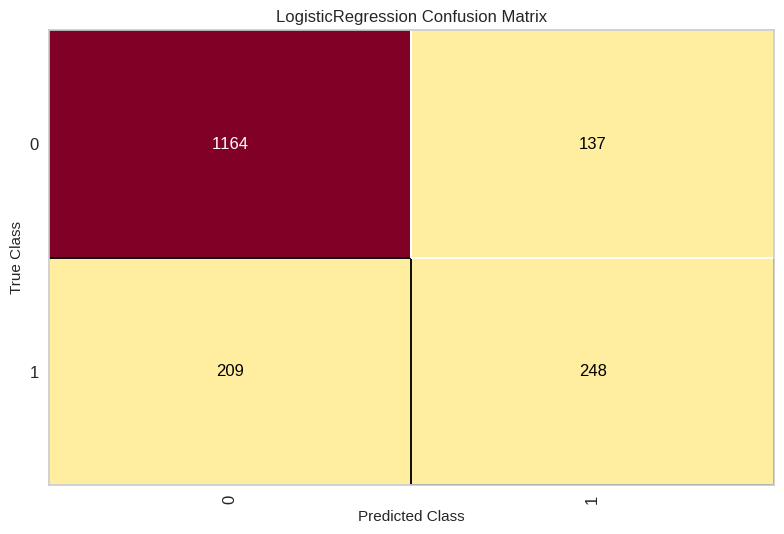

ConfusionMatrix(ax=<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x79a80bafbca0>,
                estimator=LogisticRegression())

In [ ]:
confusion_matrix(lr, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
metricas = {
    "model": ["Logistic Regression", "Logistic Regression"],
    "modo": ["Treino", "Teste"],
    "accuracy": [accuracy_score(y_train, lr.predict(X_train)), accuracy_score(y_test, lr.predict(X_test))],
    "balanced_accuracy": [balanced_accuracy_score(y_train, lr.predict(X_train)), balanced_accuracy_score(y_test, lr.predict(X_test))],
    "f1_score": [f1_score(y_train, lr.predict(X_train)), f1_score(y_test, lr.predict(X_test))],
    "precision_score": [precision_score(y_train, lr.predict(X_train)), precision_score(y_test, lr.predict(X_test))],
    "recal_score": [recall_score(y_train, lr.predict(X_train)), recall_score(y_test, lr.predict(X_test))],
    "roc_auc": [roc_auc_score(y_train, lr.predict(X_train)), roc_auc_score(y_test, lr.predict(X_test))]
}

pd.DataFrame(metricas)

,model,modo,accuracy,balanced_accuracy,f1_score,precision_score,recal_score,roc_auc
0,Logistic Regression,Treino,0.805082,0.724711,0.602475,0.663543,0.55170,0.724711
1,Logistic Regression,Teste,0.803185,0.718683,0.589074,0.644156,0.54267,0.718683


**FAZER USANDO RANDOM FOREST:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

<ipython-input-30-168a6fc83696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
X_test.assign(churn=y_test).assign(label=rf.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
3189,1.0,0.591549,0.371144,0.268105,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0
3911,0.0,0.267606,0.715920,0.202833,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
6828,0.0,0.140845,0.820896,0.128196,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
1493,1.0,0.197183,0.571144,0.130147,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0
724,1.0,0.112676,0.029851,0.021434,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0.0,0.126761,0.112935,0.032339,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
3996,0.0,0.521127,0.020398,0.083574,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
842,0.0,0.000000,0.712935,0.008204,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
2805,1.0,0.901408,0.852239,0.778710,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0


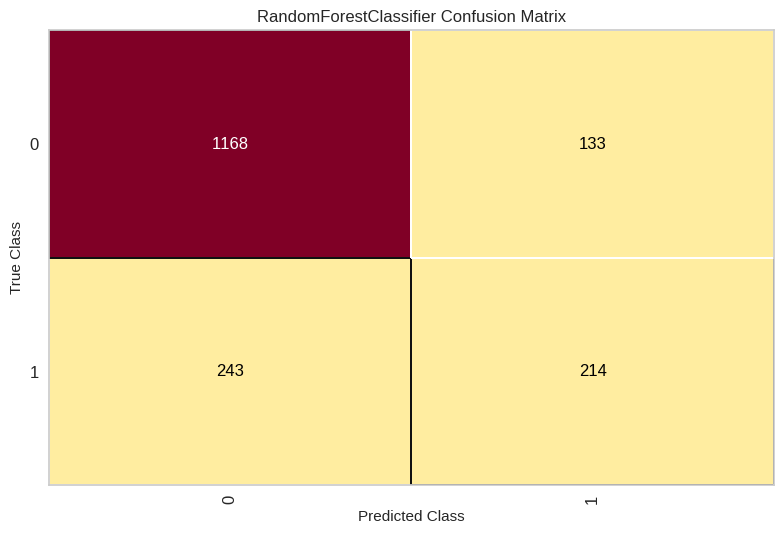

ConfusionMatrix(ax=<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x79a809d8dd20>,
                estimator=RandomForestClassifier())

In [ ]:
confusion_matrix(rf, X_train, y_train, X_test, y_test)

In [ ]:
metricasRF = {
    "model": ["Random Forest", "Random Forest"],
    "modo": ["Treino", "Teste"],
    "accuracy": [accuracy_score(y_train, rf.predict(X_train)), accuracy_score(y_test, rf.predict(X_test))],
    "balanced_accuracy": [balanced_accuracy_score(y_train, rf.predict(X_train)), balanced_accuracy_score(y_test, rf.predict(X_test))],
    "f1_score": [f1_score(y_train, rf.predict(X_train)), f1_score(y_test, rf.predict(X_test))],
    "precision_score": [precision_score(y_train, rf.predict(X_train)), precision_score(y_test, rf.predict(X_test))],
    "recal_score": [recall_score(y_train, rf.predict(X_train)), recall_score(y_test, rf.predict(X_test))],
    "roc_auc": [roc_auc_score(y_train, rf.predict(X_train)), roc_auc_score(y_test, rf.predict(X_test))]
}

pd.DataFrame(metricasRF)

,model,modo,accuracy,balanced_accuracy,f1_score,precision_score,recal_score,roc_auc
0,Random Forest,Treino,0.997725,0.997323,0.995754,0.995050,0.996459,0.997323
1,Random Forest,Teste,0.786121,0.683021,0.532338,0.616715,0.468271,0.683021


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    "max_depth": [1,2,3,4,5,6,7,8,9,10],
    "n_estimators": [100, 300, 500]
}

grid_search = GridSearchCV(rf, parameters, scoring="accuracy", cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [ ]:
# VERIFICAR HIPER PARAMETROS:

grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# TUNNAR MODELO COM OS HIPER PARAMETROS:

rf_tunned = RandomForestClassifier(
bootstrap = True,
ccp_alpha = 0.0,
class_weight = None,
criterion = 'gini',
max_depth = 8,
max_features = 'sqrt',
max_leaf_nodes = None,
max_samples = None,
min_impurity_decrease = 0.0,
min_samples_leaf = 1,
min_samples_split = 2,
min_weight_fraction_leaf = 0.0,
n_estimators = 300,
n_jobs = None,
oob_score = False,
random_state = None,
verbose = 0,
warm_start = False)

In [ ]:
# TREINAR MODELO TUNNADO:

rf_tunned.fit(X_train, y_train)

<ipython-input-41-08811392e672>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tunned.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, n_estimators=300)

In [ ]:
# assign para ficar na mesma base do x e y:

X_test.assign(churn=y_test).assign(label=rf_tunned.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
3189,1.0,0.591549,0.371144,0.268105,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0
3911,0.0,0.267606,0.715920,0.202833,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
6828,0.0,0.140845,0.820896,0.128196,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
1493,1.0,0.197183,0.571144,0.130147,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1
724,1.0,0.112676,0.029851,0.021434,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0.0,0.126761,0.112935,0.032339,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
3996,0.0,0.521127,0.020398,0.083574,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
842,0.0,0.000000,0.712935,0.008204,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
2805,1.0,0.901408,0.852239,0.778710,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0


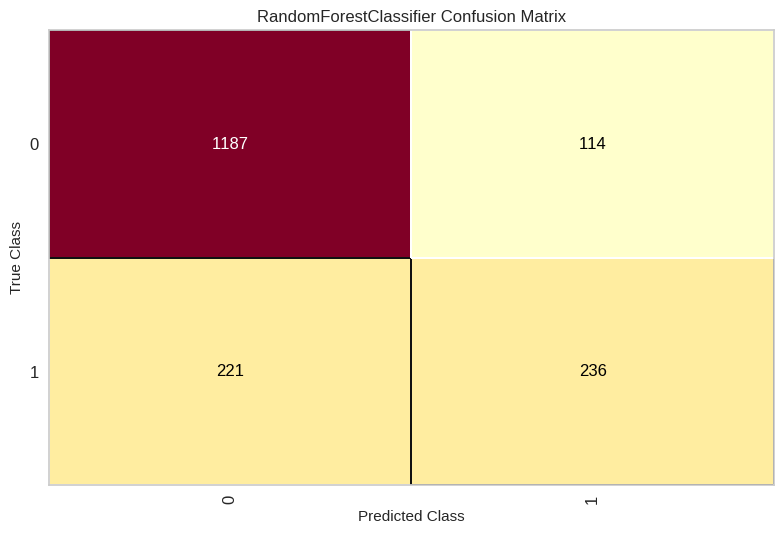

ConfusionMatrix(ax=<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x79a809b56bf0>,
                estimator=RandomForestClassifier(max_depth=8, n_estimators=300))

In [ ]:
# Execute a função de matriz de confusão em valores reais e previstos

confusion_matrix(rf_tunned, X_train, y_train, X_test, y_test)

In [ ]:
metricasRF_Tunned = {
    "model": ["Random Forest Tunned", "Random Forest Tunned"],
    "modo": ["Treino", "Teste"],
    "accuracy": [accuracy_score(y_train, rf_tunned.predict(X_train)), accuracy_score(y_test, rf_tunned.predict(X_test))],
    "balanced_accuracy": [balanced_accuracy_score(y_train, rf_tunned.predict(X_train)), balanced_accuracy_score(y_test, rf_tunned.predict(X_test))],
    "f1_score": [f1_score(y_train, rf_tunned.predict(X_train)), f1_score(y_test, rf_tunned.predict(X_test))],
    "precision_score": [precision_score(y_train, rf_tunned.predict(X_train)), precision_score(y_test, rf_tunned.predict(X_test))],
    "recal_score": [recall_score(y_train, rf_tunned.predict(X_train)), recall_score(y_test, rf_tunned.predict(X_test))],
    "roc_auc": [roc_auc_score(y_train, rf_tunned.predict(X_train)), roc_auc_score(y_test, rf_tunned.predict(X_test))]
}

pd.DataFrame(metricasRF_Tunned)

,model,modo,accuracy,balanced_accuracy,f1_score,precision_score,recal_score,roc_auc
0,Random Forest Tunned,Treino,0.832196,0.747942,0.643863,0.745573,0.566572,0.747942
1,Random Forest Tunned,Teste,0.809443,0.714393,0.584882,0.674286,0.516411,0.714393
